In [ ]:
"""
Jason Qin
CS230

Convert NRRD files containing CT scan segmentation masks to NumPy arrays.
"""

In [89]:
import nrrd
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pydicom as dicom

In [86]:
# mask, header = nrrd.read('/data2/yeom/ky_aneur/segmentation/Segmentation_1.25/Allen_Duane.seg.nrrd')
# mask, header = nrrd.read('/data2/yeom/ky_aneur/segmentation/Segmentation_1.25/Amaro_Christina.seg.nrrd')
# mask, header = nrrd.read('/data2/yeom/ky_aneur/segmentation/Segmentation_1.25/Andrade_Alicia.seg.nrrd')
mask = nib.load('/data2/yeom/ky_aneur/itk_seg/itk-seg/)

(512, 512, 496)
(array([346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357]),)


'\nfor i in range(400, 565):\n    print(np.sum(maskData[:, :, i]))\n'

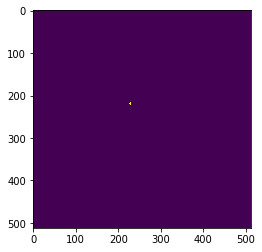

In [88]:
print(mask.shape)
maskData = mask.get_data()
maskSums = np.sum(maskData, axis=0)
maskSums = np.sum(maskSums, axis=0)
print(np.where(maskSums > 0))
plt.imshow(maskData[:, :, 346])
"""
for i in range(400, 565):
    print(np.sum(maskData[:, :, i]))
"""
# np.sum(maskData[:, :, 205])
# plt.imshow(maskData[:, :, 5])
# print(mask.header)
# print(header)

In [ ]:
# find which masks are relevant

In [37]:
dcmFile = '/data2/yeom/ky_aneur/sah/Allen Renee/
with open(dcmFile, 'rb') as d:
    dcmData = dicom.dcmread(d)

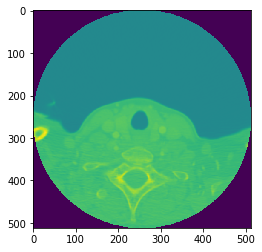

In [41]:
plt.imshow(dcmData.pixel_array)

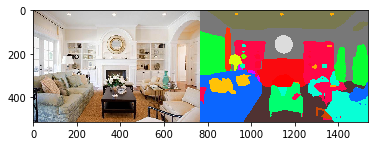

In [92]:
img = mpimg.imread('/home/ky_aneur/cs230/resnet/semantic-segmentation-pytorch/ADE_val_00001519.png')
plt.imshow(img)

[[[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  ...
  [0.43137255 0.15294118 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  ...
  [0.43137255 0.15294118 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  [0.43137255 0.15294118 0.05882353]
  ...
  [0.43137255 0.15294118 0.05882353]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 ...

 [[0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.3137255  0.3137255  0.7058824 ]
  ...
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.         0.         0.        ]]

 [[0.         0.         0.        ]
  [0.         0.         0.        ]


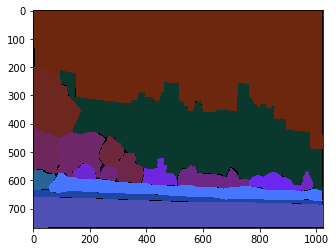

In [103]:
img = mpimg.imread('/home/ky_aneur/cs230/resnet/sceneparsing/convertFromADE/ADE_train_00000970_raw.png')
plt.imshow(img)
print(img[:,:,:])